In [3]:
import gc
import pandas as pd
import numpy as np 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics

from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.model_selection import train_test_split
# 相关全局设置
pd.set_option('display.max_columns', None)
sns.set()
train_data = pd.read_csv('data/used_car_train_20200313.csv', sep=' ')
testb_data = pd.read_csv('data/used_car_testB_20200421.csv', sep=' ')

## EDA

查看数据整体情况

In [4]:
train_data.head().append(train_data.tail())
train_data.describe()
train_data.info()

C:\Users\user\AppData\Local\Temp\ipykernel_3828\2304476722.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_data.head().append(train_data.tail())


SaleID    name   regDate  model  brand  bodyType  fuelType  gearbox  \
0            0     736  20040402   30.0      6       1.0       0.0      0.0   
1            1    2262  20030301   40.0      1       2.0       0.0      0.0   
2            2   14874  20040403  115.0     15       1.0       0.0      0.0   
3            3   71865  19960908  109.0     10       0.0       0.0      1.0   
4            4  111080  20120103  110.0      5       1.0       0.0      0.0   
149995  149995  163978  20000607  121.0     10       4.0       0.0      1.0   
149996  149996  184535  20091102  116.0     11       0.0       0.0      0.0   
149997  149997  147587  20101003   60.0     11       1.0       1.0      0.0   
149998  149998   45907  20060312   34.0     10       3.0       1.0      0.0   
149999  149999  177672  19990204   19.0     28       6.0       0.0      1.0   

        power  kilometer notRepairedDamage  regionCode  seller  offerType  \
0          60       12.5               0.0        1046       0          0   
1           0       15.0                 -        4366       0          0   
2         163       12.5               0.0        2806       0          0   
3         193       15.0               0.0         434       0          0   
4          68        5.0               0.0        6977       0          0   
149995    163       15.0               0.0        4576       0          0   
149996    125       10.0               0.0        2826       0          0   
149997     90        6.0               0.0        3302       0          0   
149998    156       15.0               0.0        1877       0          0   
149999    193       12.5               0.0         235       0          0   

        creatDate  price        v_0       v_1       v_2       v_3       v_4  \
0        20160404   1850  43.357796  3.966344  0.050257  2.159744  1.143786   
1        20160309   3600  45.305273  5.236112  0.137925  1.380657 -1.422165   
2        20160402   6222  45.978359  4.823792  1.319524 -0.998467 -0.996911   
3        20160312   2400  45.687478  4.492574 -0.050616  0.883600 -2.228079   
4        20160313   5200  44.383511  2.031433  0.572169 -1.571239  2.246088   
149995   20160327   5900  45.316543 -3.139095 -1.269707 -0.736609 -1.505820   
149996   20160312   9500  45.972058 -3.143764 -0.023523 -2.366699  0.698012   
149997   20160328   7500  44.733481 -3.105721  0.595454 -2.279091  1.423661   
149998   20160401   4999  45.658634 -3.204785 -0.441680 -1.179812  0.620680   
149999   20160305   4700  45.536383 -3.200326 -1.612893 -0.067144 -1.396166   

             v_5       v_6       v_7       v_8       v_9      v_10      v_11  \
0       0.235676  0.101988  0.129549  0.022816  0.097462 -2.881803  2.804097   
1       0.264777  0.121004  0.135731  0.026597  0.020582 -4.900482  2.096338   
2       0.251410  0.114912  0.165147  0.062173  0.027075 -4.846749  1.803559   
3       0.274293  0.110300  0.121964  0.033395  0.000000 -4.509599  1.285940   
4       0.228036  0.073205  0.091880  0.078819  0.121534 -1.896240  0.910783   
149995  0.280264  0.000310  0.048441  0.071158  0.019174  1.988114 -2.983973   
149996  0.253217  0.000777  0.084079  0.099681  0.079371  1.839166 -2.774615   
149997  0.233353  0.000705  0.118872  0.100118  0.097914  2.439812 -1.630677   
149998  0.256369  0.000252  0.081479  0.083558  0.081498  2.075380 -2.633719   
149999  0.284475  0.000000  0.040072  0.062543  0.025819  1.978453 -3.179913   

            v_12      v_13      v_14  
0      -2.420821  0.795292  0.914762  
1      -1.030483 -1.722674  0.245522  
2       1.565330 -0.832687 -0.229963  
3      -0.501868 -2.438353 -0.478699  
4       0.931110  2.834518  1.923482  
149995  0.589167 -1.304370 -0.302592  
149996  2.553994  0.924196 -0.272160  
149997  2.290197  1.891922  0.414931  
149998  1.414937  0.431981 -1.659014  
149999  0.031724 -1.483350 -0.342674

SaleID           name       regDate          model  \
count  150000.000000  150000.000000  1.500000e+05  149999.000000   
mean    74999.500000   68349.172873  2.003417e+07      47.129021   
std     43301.414527   61103.875095  5.364988e+04      49.536040   
min         0.000000       0.000000  1.991000e+07       0.000000   
25%     37499.750000   11156.000000  1.999091e+07      10.000000   
50%     74999.500000   51638.000000  2.003091e+07      30.000000   
75%    112499.250000  118841.250000  2.007111e+07      66.000000   
max    149999.000000  196812.000000  2.015121e+07     247.000000   

               brand       bodyType       fuelType        gearbox  \
count  150000.000000  145494.000000  141320.000000  144019.000000   
mean        8.052733       1.792369       0.375842       0.224943   
std         7.864956       1.760640       0.548677       0.417546   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       0.000000       0.000000       0.000000   
50%         6.000000       1.000000       0.000000       0.000000   
75%        13.000000       3.000000       1.000000       0.000000   
max        39.000000       7.000000       6.000000       1.000000   

               power      kilometer     regionCode         seller  offerType  \
count  150000.000000  150000.000000  150000.000000  150000.000000   150000.0   
mean      119.316547      12.597160    2583.077267       0.000007        0.0   
std       177.168419       3.919576    1885.363218       0.002582        0.0   
min         0.000000       0.500000       0.000000       0.000000        0.0   
25%        75.000000      12.500000    1018.000000       0.000000        0.0   
50%       110.000000      15.000000    2196.000000       0.000000        0.0   
75%       150.000000      15.000000    3843.000000       0.000000        0.0   
max     19312.000000      15.000000    8120.000000       1.000000        0.0   

          creatDate          price            v_0            v_1  \
count  1.500000e+05  150000.000000  150000.000000  150000.000000   
mean   2.016033e+07    5923.327333      44.406268      -0.044809   
std    1.067328e+02    7501.998477       2.457548       3.641893   
min    2.015062e+07      11.000000      30.451976      -4.295589   
25%    2.016031e+07    1300.000000      43.135799      -3.192349   
50%    2.016032e+07    3250.000000      44.610266      -3.052671   
75%    2.016033e+07    7700.000000      46.004721       4.000670   
max    2.016041e+07   99999.000000      52.304178       7.320308   

                 v_2            v_3            v_4            v_5  \
count  150000.000000  150000.000000  150000.000000  150000.000000   
mean        0.080765       0.078833       0.017875       0.248204   
std         2.929618       2.026514       1.193661       0.045804   
min        -4.470671      -7.275037      -4.364565       0.000000   
25%        -0.970671      -1.462580      -0.921191       0.243615   
50%        -0.382947       0.099722      -0.075910       0.257798   
75%         0.241335       1.565838       0.868758       0.265297   
max        19.035496       9.854702       6.829352       0.291838   

                 v_6            v_7            v_8            v_9  \
count  150000.000000  150000.000000  150000.000000  150000.000000   
mean        0.044923       0.124692       0.058144       0.061996   
std         0.051743       0.201410       0.029186       0.035692   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000038       0.062474       0.035334       0.033930   
50%         0.000812       0.095866       0.057014       0.058484   
75%         0.102009       0.125243       0.079382       0.087491   
max         0.151420       1.404936       0.160791       0.222787   

                v_10           v_11           v_12           v_13  \
count  150000.000000  150000.000000  150000.000000  150000.000000   
mean       -0.001000       0.009035       0.004813       0.0003

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

查看数据异常情况和缺失值

In [5]:
date_cols = ['regDate', 'creatDate']
cate_cols = ['name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage', 'regionCode', 'seller', 'offerType']
num_cols = ['power', 'kilometer'] + ['v_{}'.format(i) for i in range(15)]
data = pd.concat([train_data, testb_data])
cols = date_cols + cate_cols + num_cols

tmp = pd.DataFrame()
tmp['count'] = data[cols].count().values
tmp['missing_rate'] = (data.shape[0] - tmp['count']) / data.shape[0]
tmp['nunique'] = data[cols].nunique().values
tmp.index = cols
tmp

count  missing_rate  nunique
regDate            200000      0.000000     3898
creatDate          200000      0.000000      106
name               200000      0.000000   128660
model              199999      0.000005      248
brand              200000      0.000000       40
bodyType           193990      0.030050        8
fuelType           188396      0.058020        7
gearbox            192051      0.039745        2
notRepairedDamage  200000      0.000000        3
regionCode         200000      0.000000     8010
seller             200000      0.000000        2
offerType          200000      0.000000        1
power              200000      0.000000      616
kilometer          200000      0.000000       13
v_0                200000      0.000000   189740
v_1                200000      0.000000   189741
v_2                200000      0.000000   189740
v_3                200000      0.000000   189741
v_4                200000      0.000000   189741
v_5                200000      0.000000   183941
v_6                200000      0.000000   144599
v_7                200000      0.000000   182791
v_8                200000      0.000000   187726
v_9                200000      0.000000   185291
v_10               200000      0.000000   189740
v_11               200000      0.000000   189740
v_12               200000      0.000000   189740
v_13               200000      0.000000   189741
v_14               200000      0.000000   189741

查看缺失值的情况

In [6]:
train_data.model.unique()

array([ 30.,  40., 115., 109., 110.,  24.,  13.,  26.,  19.,   7.,   1.,
        48.,  65., 138., 105., 114.,   0.,   8.,  78.,  21.,   3.,   4.,
        31., 121.,  75.,  17., 107.,  16., 111.,  47.,   5.,  44., 200.,
       155.,  87.,  20.,  22.,  63.,  49.,  29.,  88.,  60.,  73.,  39.,
        23.,  11.,  69., 167., 199., 178., 101.,   6.,  10.,  57.,  33.,
        32.,  52.,  46.,  74.,  93., 125.,  41., 127., 104.,  98.,  68.,
       156., 116., 170., 160.,  85.,  80., 143.,  77., 166.,  53.,  66.,
       203.,  14.,  42., 119., 174., 177., 210.,  36., 238.,  70.,  58.,
       126.,  84.,  97., 108., 192.,  64.,  15.,  95.,  54., 142.,  55.,
       218., 222., 163.,  76.,  83., 122.,  18., 124., 106.,  59., 228.,
       164., 165., 145.,  94., 186., 220., 179.,  67.,  71.,  25., 144.,
       212., 172., 168., 206., 152., 123., 182.,  38., 117., 132.,  99.,
       183., 219.,  62., 173.,  82.,  34., 102., 213.,  92., 162.,  43.,
       175.,  35.,  61., 113., 137., 226., 161., 13

In [7]:
train_data.model.nunique()

248

先查看异常值

<Axes: >

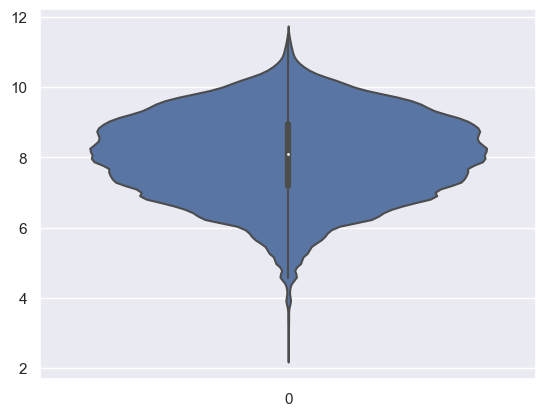

In [8]:
#通过小提琴图图查看异常值
sns.violinplot(np.log(train_data['price']))

<Axes: >

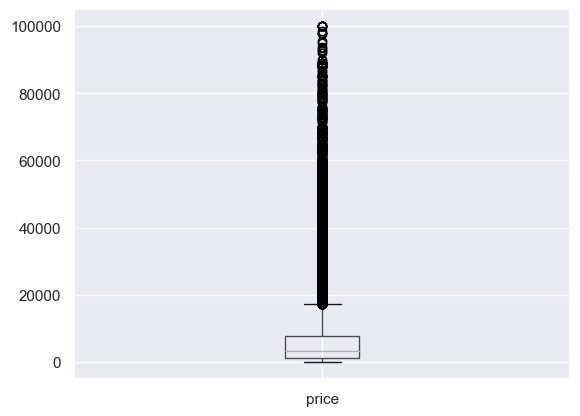

In [9]:
train_data[['price']].boxplot()

In [10]:
train_data.price.describe()

count    150000.000000
mean       5923.327333
std        7501.998477
min          11.000000
25%        1300.000000
50%        3250.000000
75%        7700.000000
max       99999.000000
Name: price, dtype: float64

C:\Users\user\AppData\Local\Temp\ipykernel_3828\3656494103.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['price'])


<Axes: xlabel='price', ylabel='Density'>

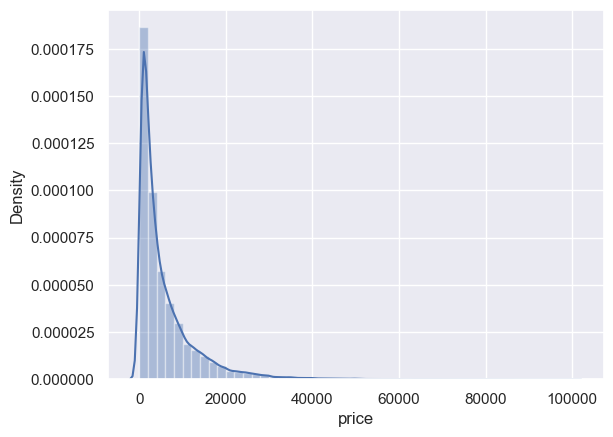

In [11]:
sns.distplot(train_data['price'])


C:\Users\user\AppData\Local\Temp\ipykernel_3828\4013667124.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(train_data['price']))


<Axes: xlabel='price', ylabel='Density'>

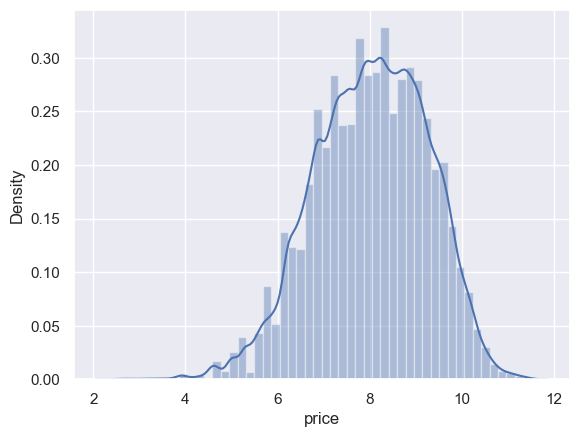

In [12]:
sns.distplot(np.log(train_data['price']))

取对数以后，发现在成正态分布

二手车交易的市场价平均在7千，但是大部分的车更便宜,但是不乏一些好的车型，所以有些车可能会还是很贵，不能简单的讲数据删除，好车的高价格拉大了平均值

对于缺失值先看一下数据的相关性分析

查看训练集和测试集偏度和峰度

In [13]:
tmp = pd.DataFrame(index = num_cols)
for col in num_cols:
    tmp.loc[col, 'train_Skewness'] = train_data[col].skew()
    tmp.loc[col, 'test_Skewness'] = testb_data[col].skew()
    tmp.loc[col, 'train_Kurtosis'] = train_data[col].kurt()
    tmp.loc[col, 'test_Kurtosis'] = testb_data[col].kurt()
tmp

train_Skewness  test_Skewness  train_Kurtosis  test_Kurtosis
power           65.863178      60.022958     5733.451054    4533.765856
kilometer       -1.525921      -1.523389        1.141934       1.132865
v_0             -1.316712      -1.309174        3.993841       3.975003
v_1              0.359454       0.371557       -1.753017      -1.741503
v_2              4.842556       4.842439       23.860591      23.851258
v_3              0.106292       0.085307       -0.418006      -0.441850
v_4              0.367989       0.376527       -0.197295      -0.217030
v_5             -4.737094      -4.729964       22.934081      22.874850
v_6              0.368073       0.380337       -1.742567      -1.730630
v_7              5.130233       5.127163       25.845489      25.825960
v_8              0.204613       0.218992       -0.636225      -0.623751
v_9              0.419501       0.423079       -0.321491      -0.325868
v_10             0.025220       0.018198       -0.577935      -0.562547
v_11             3.029146       3.016425       12.568731      12.481580
v_12             0.365358       0.381130        0.268937       0.319173
v_13             0.267915       0.260146       -0.438274      -0.488693
v_14            -1.186355      -1.210527        2.393526       2.395777

训练集和测试集分布应该是相同的，不用做变换

查看数值属性之间的相关性，还有和price之间的关系

v_3         -0.730946
kilometer   -0.440519
v_11        -0.275320
v_10        -0.246175
v_9         -0.206205
v_4         -0.147085
v_7         -0.053024
v_13        -0.013993
v_14         0.035911
v_1          0.060914
v_6          0.068970
v_2          0.085322
v_5          0.164317
power        0.219834
v_0          0.628397
v_8          0.685798
v_12         0.692823
price        1.000000
Name: price, dtype: float64

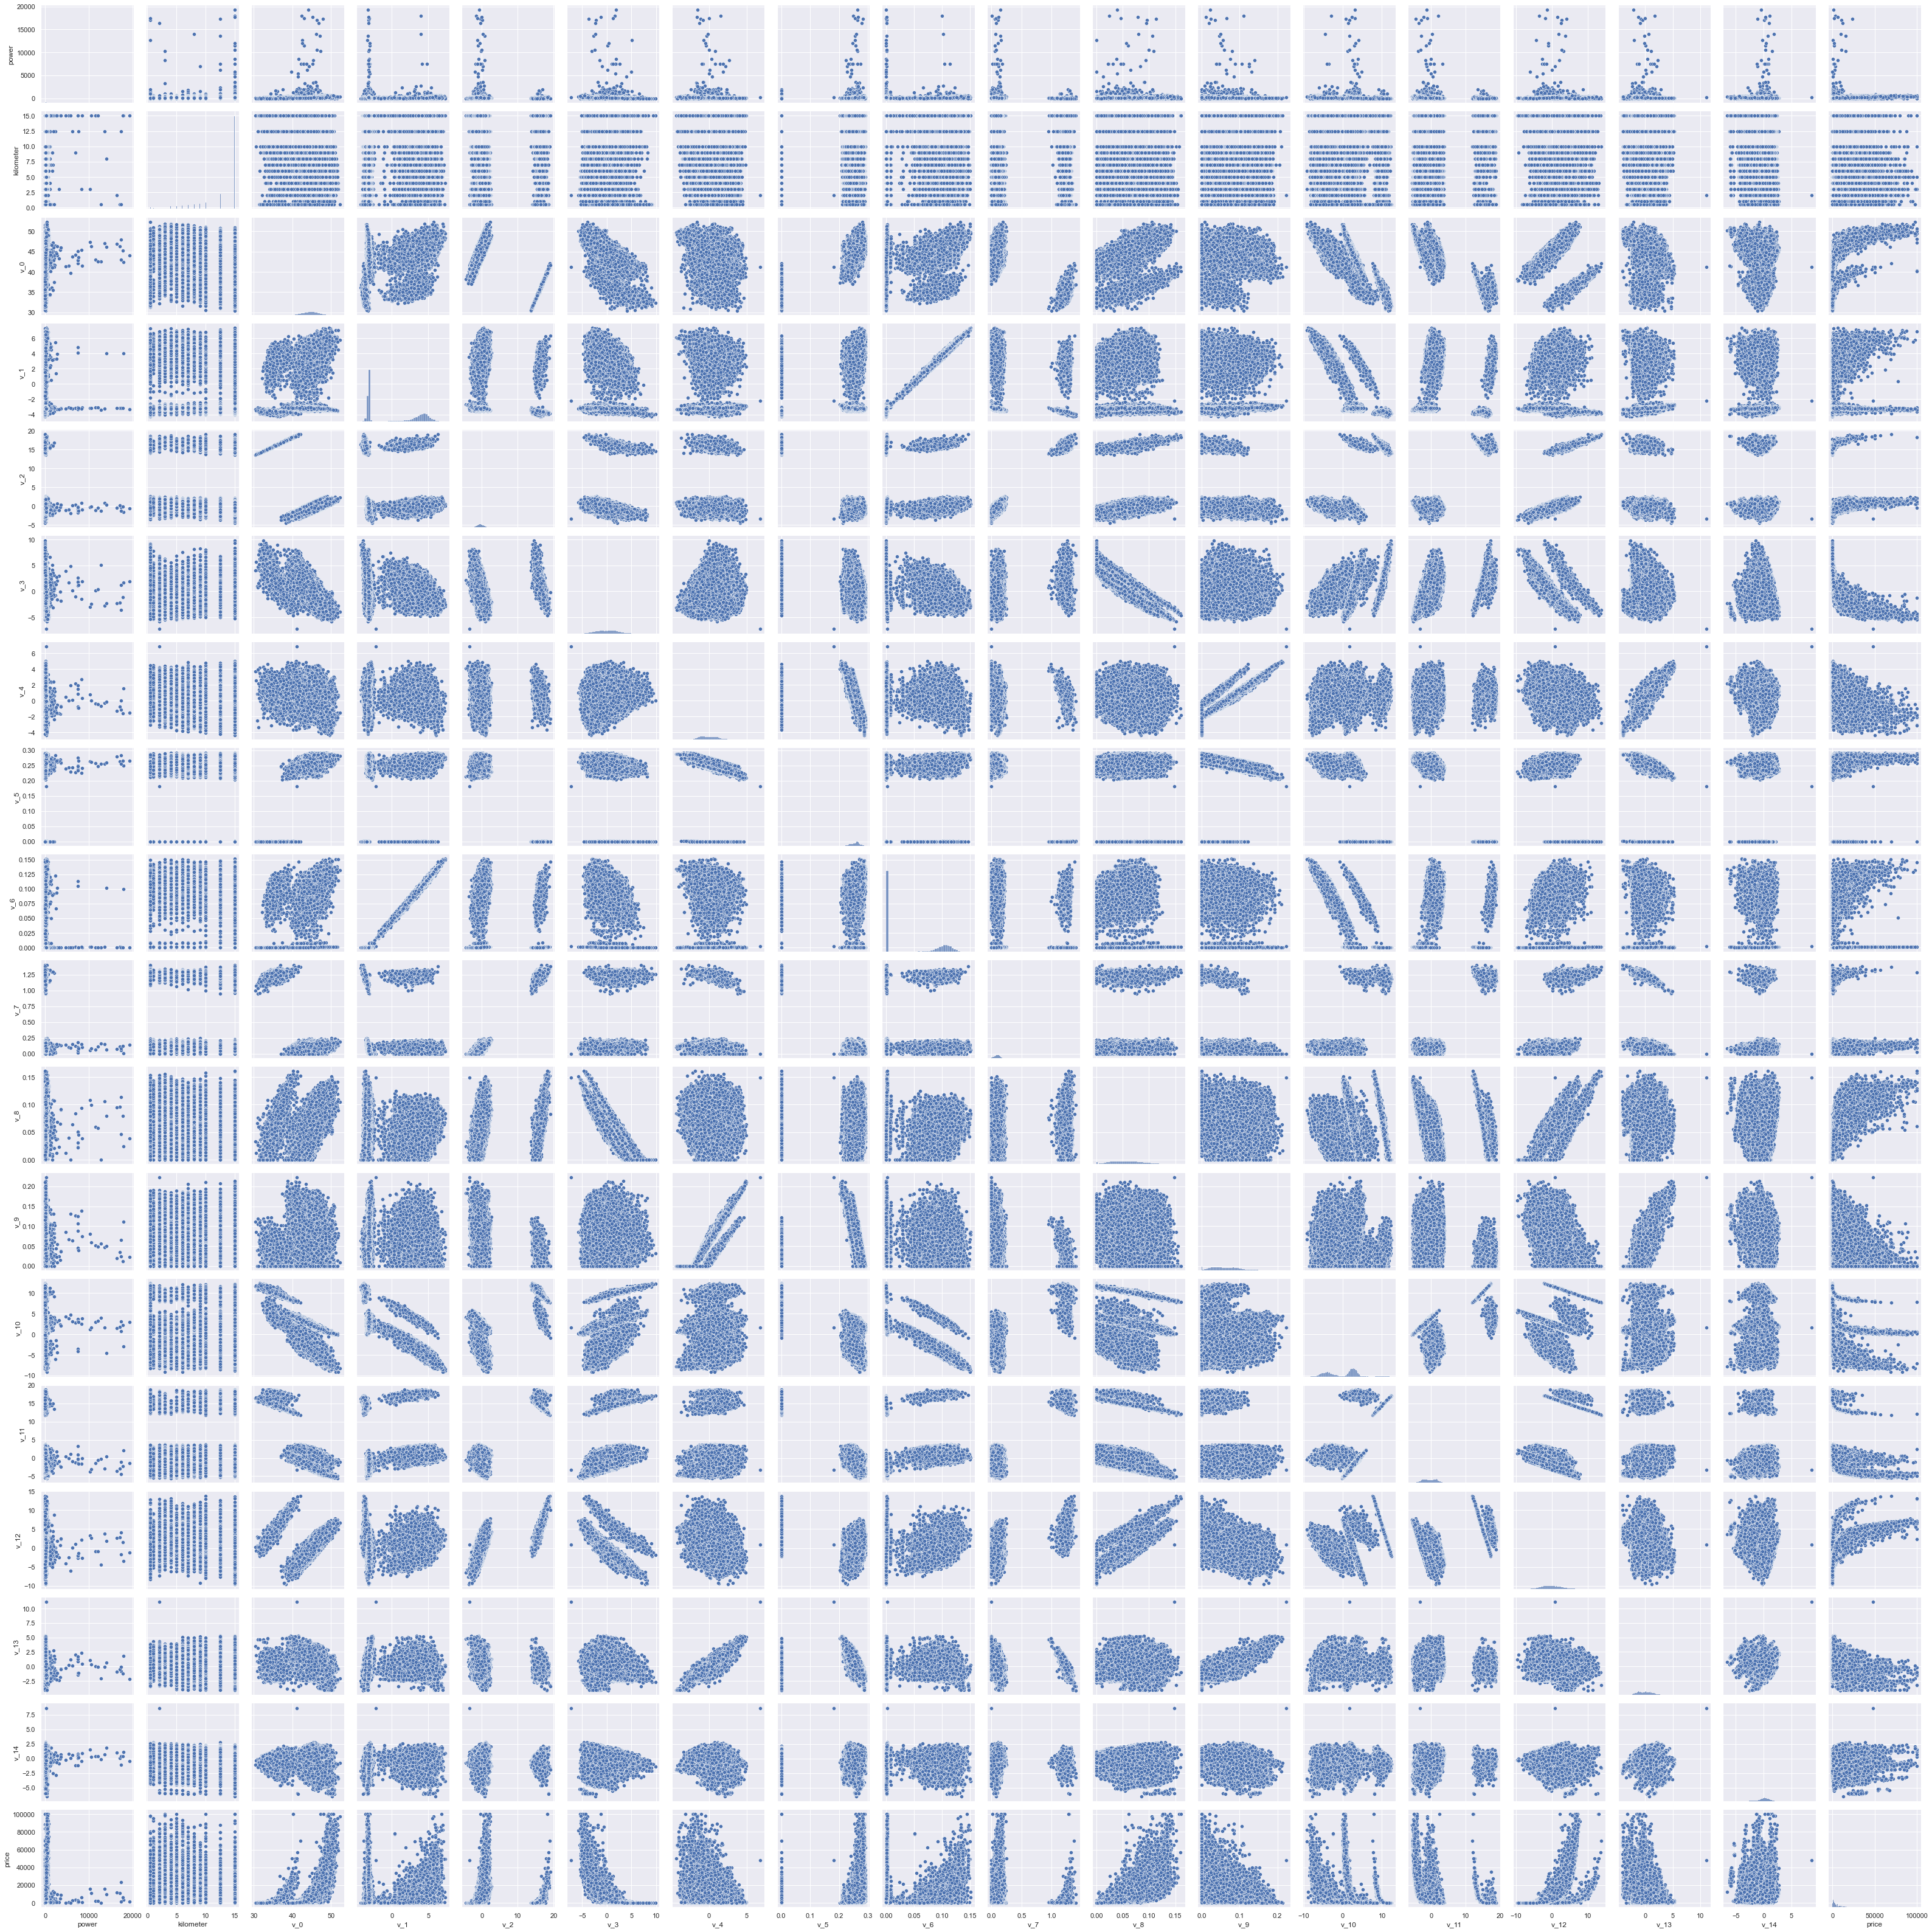

In [12]:
#特征与目标变量之前的相关性分析
correlation = train_data[num_cols+['price']].corr()
correlation['price'].sort_values()

#特征相互之间的关系可视化
sns.pairplot(train_data[num_cols+['price']])

kilometer V3这两个属性和price 的相关性比较大，都是负相关，V12、V8 、V0和price正相关 

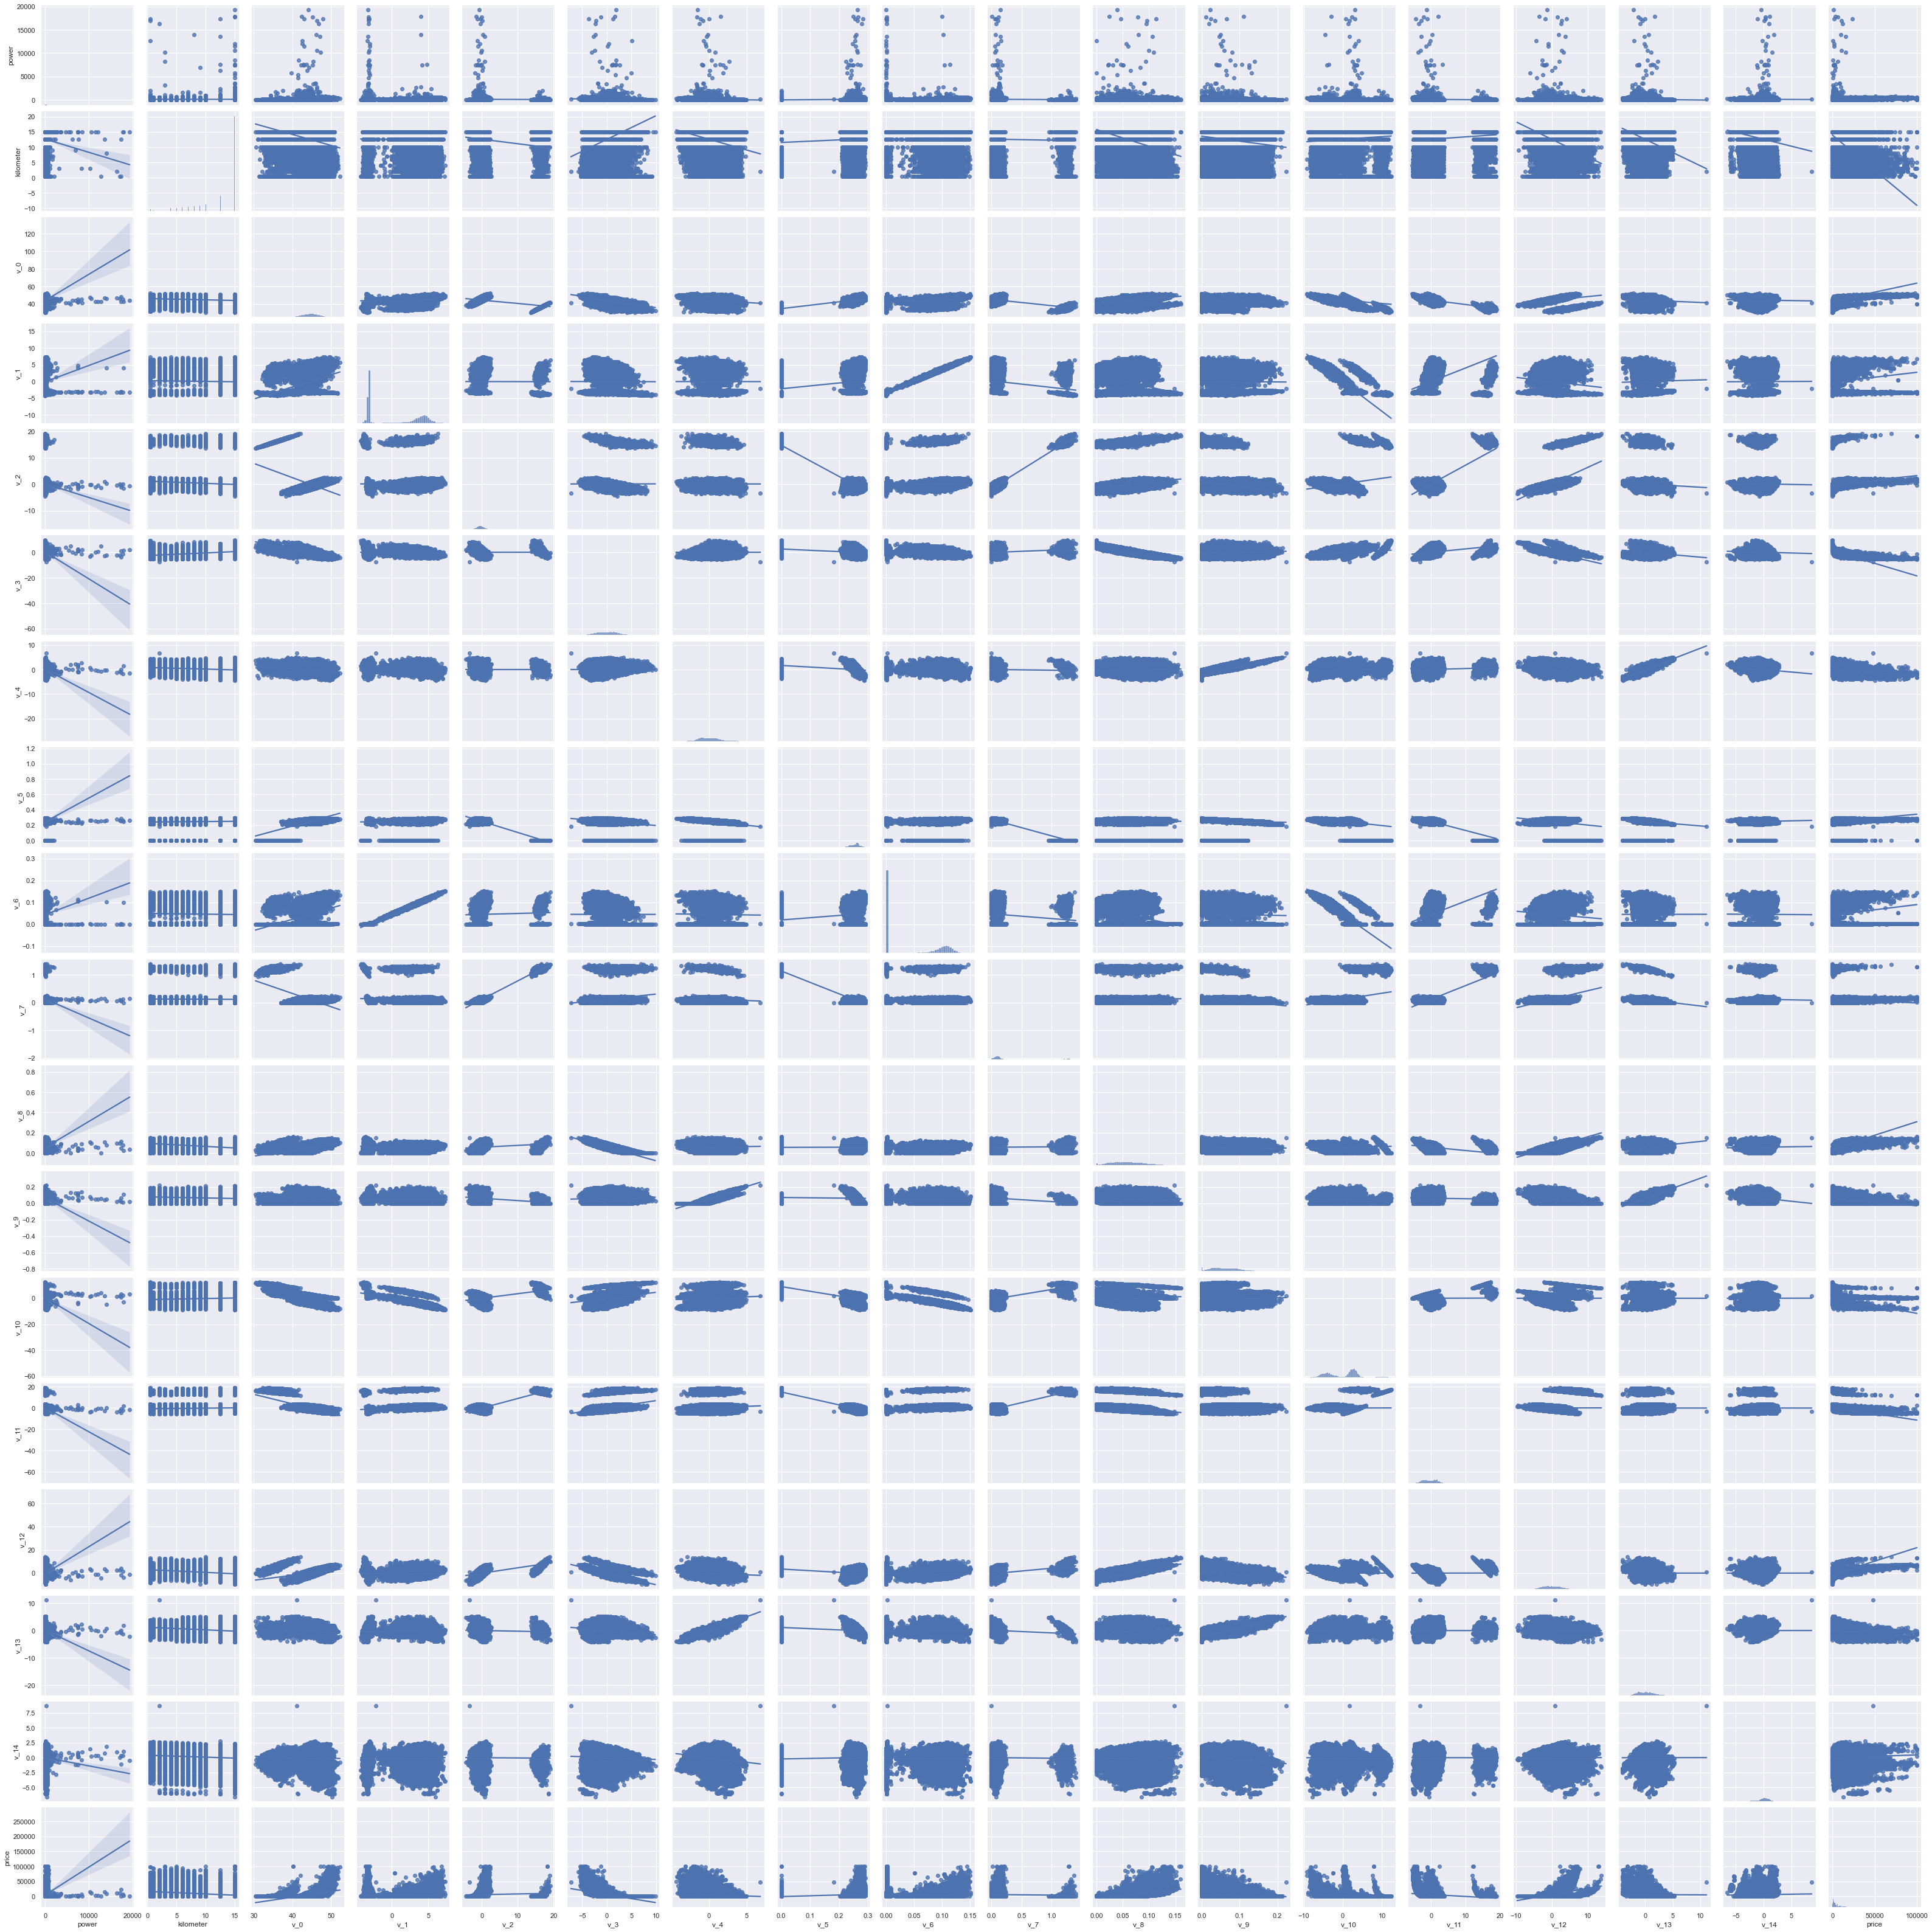

In [13]:
#特征相互之间的关系可视化
sns.pairplot(train_data[num_cols+['price']],kind='reg')

对类别特征进行分析

In [14]:
for col in cate_cols:
    col
    train_data[col].value_counts()

'name'

708       282
387       282
55        280
1541      263
203       233
         ... 
119983      1
63443       1
104410      1
154956      1
177672      1
Name: name, Length: 99662, dtype: int64

'model'

0.0      11762
19.0      9573
4.0       8445
1.0       6038
29.0      5186
         ...  
240.0        2
209.0        2
245.0        2
242.0        2
247.0        1
Name: model, Length: 248, dtype: int64

'brand'

0     31480
4     16737
14    16089
10    14249
1     13794
6     10217
9      7306
5      4665
13     3817
11     2945
3      2461
7      2361
16     2223
8      2077
25     2064
27     2053
21     1547
15     1458
19     1388
20     1236
12     1109
22     1085
26      966
30      940
17      913
24      772
28      649
32      592
29      406
37      333
2       321
31      318
18      316
36      228
34      227
33      218
23      186
35      180
38       65
39        9
Name: brand, dtype: int64

'bodyType'

0.0    41420
1.0    35272
2.0    30324
3.0    13491
4.0     9609
5.0     7607
6.0     6482
7.0     1289
Name: bodyType, dtype: int64

'fuelType'

0.0    91656
1.0    46991
2.0     2212
3.0      262
4.0      118
5.0       45
6.0       36
Name: fuelType, dtype: int64

'gearbox'

0.0    111623
1.0     32396
Name: gearbox, dtype: int64

'notRepairedDamage'

0.0    111361
-       24324
1.0     14315
Name: notRepairedDamage, dtype: int64

'regionCode'

419     369
764     258
125     137
176     136
462     134
       ... 
6377      1
7994      1
7973      1
7975      1
8117      1
Name: regionCode, Length: 7905, dtype: int64

'seller'

0    149999
1         1
Name: seller, dtype: int64

'offerType'

0    150000
Name: offerType, dtype: int64

seller 和 offerType的类别倾向很严重，可以直接去掉，不需要考虑

对数值类型的属性进行分析，然后分析kilometer V3（负相关），V12、V8 、V0（和price正相关）

对这几种属性分析相关性

In [15]:
train_data.kilometer.nunique()

13

In [16]:
train_data.kilometer.unique()

array([12.5, 15. ,  5. , 10. ,  2. ,  6. ,  3. ,  7. ,  8. ,  9. ,  4. ,
        1. ,  0.5])

C:\Users\user\AppData\Local\Temp\ipykernel_3828\2945089534.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['kilometer'])


<Axes: xlabel='kilometer', ylabel='Density'>

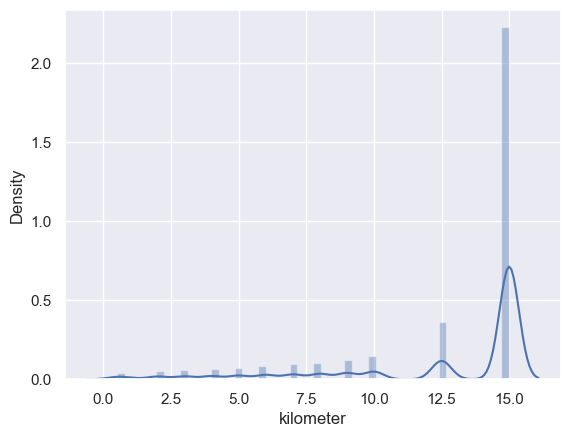

In [17]:
sns.distplot(train_data['kilometer'])

大部分车的行驶路程在15，下面形式路程的对数是否有特殊的分布形式

C:\Users\user\AppData\Local\Temp\ipykernel_3828\2889016564.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(train_data['kilometer']))


<Axes: xlabel='kilometer', ylabel='Density'>

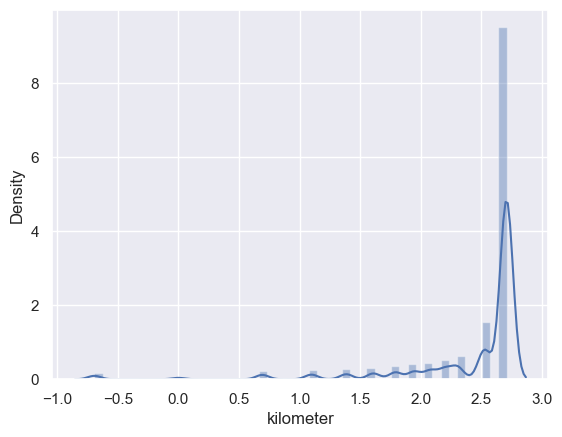

In [18]:
sns.distplot(np.log(train_data['kilometer']))

price和kilometer的关系

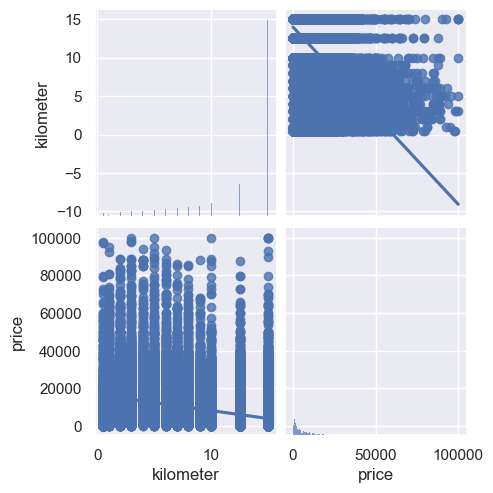

In [21]:
sns.pairplot(train_data[['kilometer','price']],kind='reg')

kilometer中15所占的比例非常高，可以不考虑，

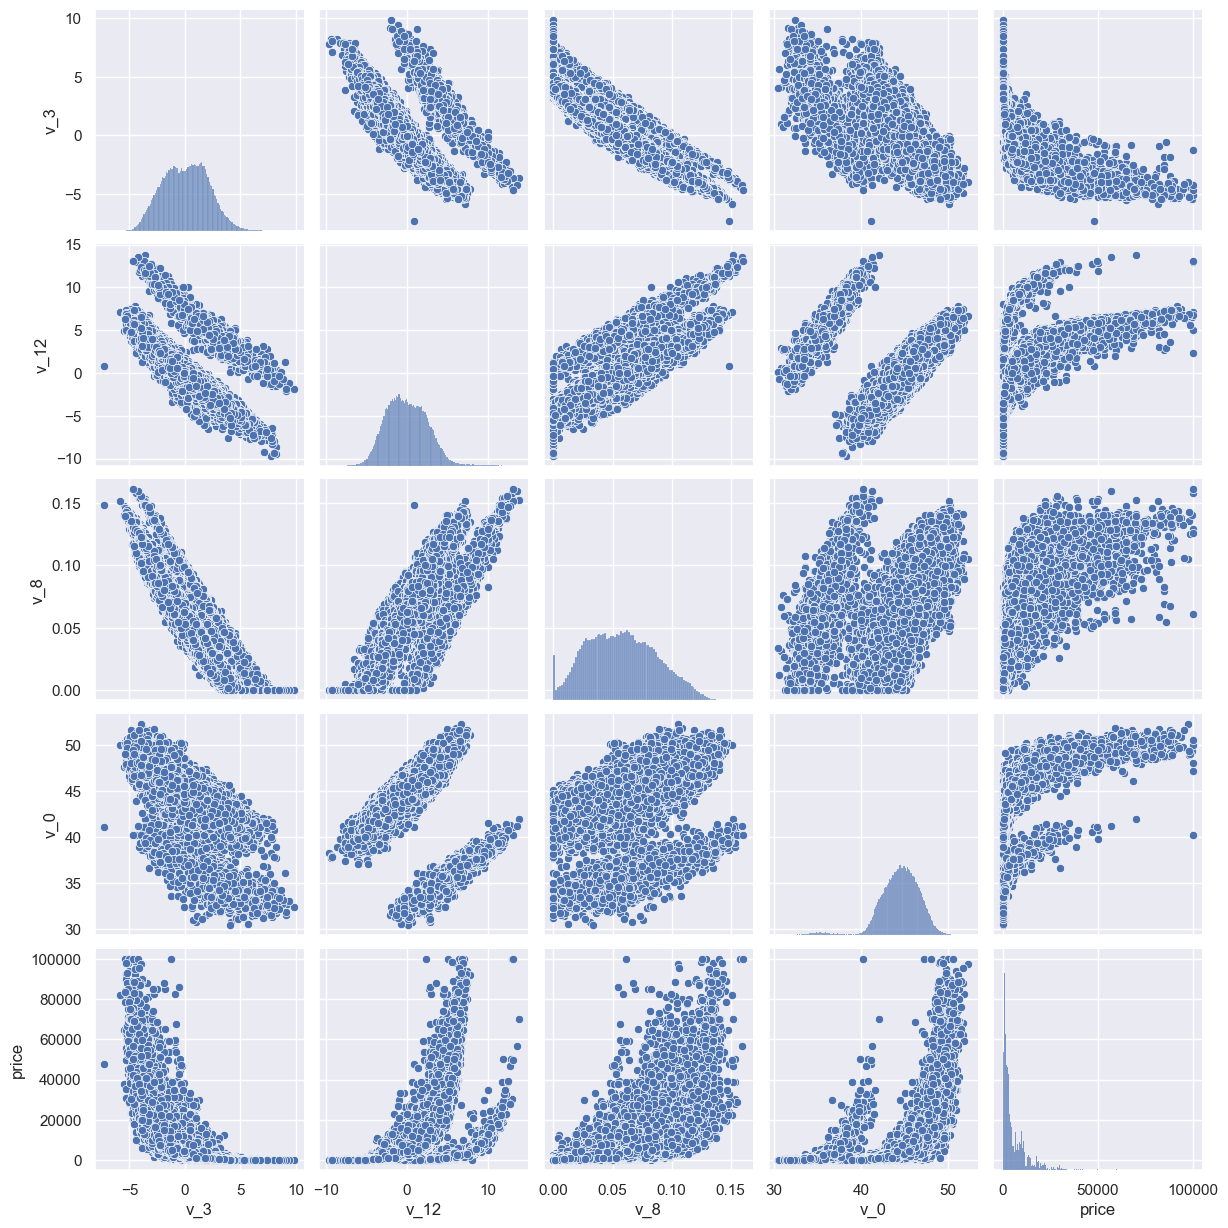

In [24]:
sns.pairplot(train_data[['v_3','v_12','v_8','v_0','price']])

In [19]:
train_data.v_3.nunique()

143998

C:\Users\user\AppData\Local\Temp\ipykernel_3828\1989480662.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['v_3'])


<Axes: xlabel='v_3', ylabel='Density'>

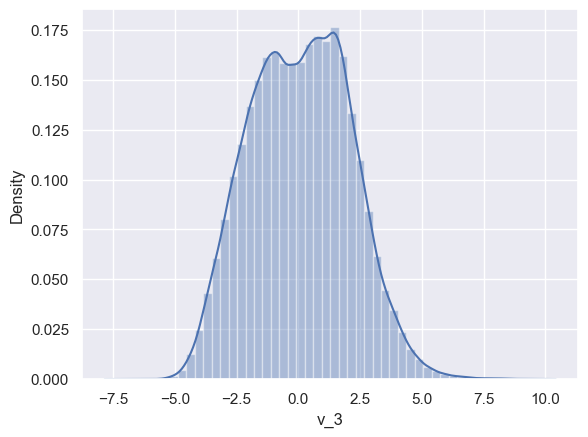

In [20]:
sns.distplot(train_data['v_3'])

V_3类似于正太分布

V12、V8 、V0（和price正相关）

In [25]:
train_data.v_12.unique()

array([-2.42082079, -1.03048284,  1.56532963, ...,  2.5539941 ,
        1.41493742,  0.03172351])

In [26]:
train_data.v_12.nunique()

143997

C:\Users\user\AppData\Local\Temp\ipykernel_3828\3172039706.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['v_12'])


<Axes: xlabel='v_12', ylabel='Density'>

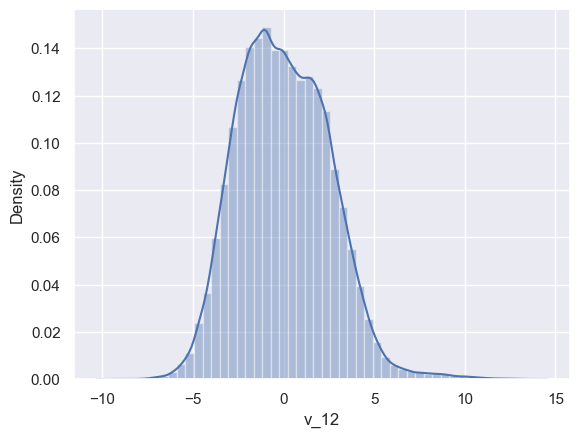

In [27]:
sns.distplot(train_data['v_12'])

v_12正太分布

In [28]:
train_data.v_8.nunique()

142451

C:\Users\user\AppData\Local\Temp\ipykernel_3828\2467821623.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['v_8'])


<Axes: xlabel='v_8', ylabel='Density'>

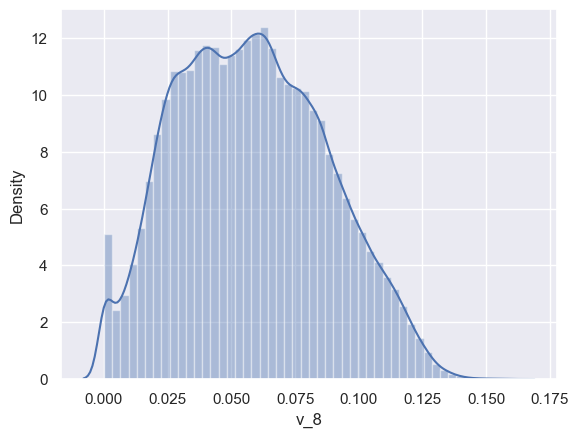

In [30]:
sns.distplot(train_data['v_8'])

In [32]:
train_data.v_0.nunique()

143997

C:\Users\user\AppData\Local\Temp\ipykernel_3828\1912909967.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['v_0'])


<Axes: xlabel='v_0', ylabel='Density'>

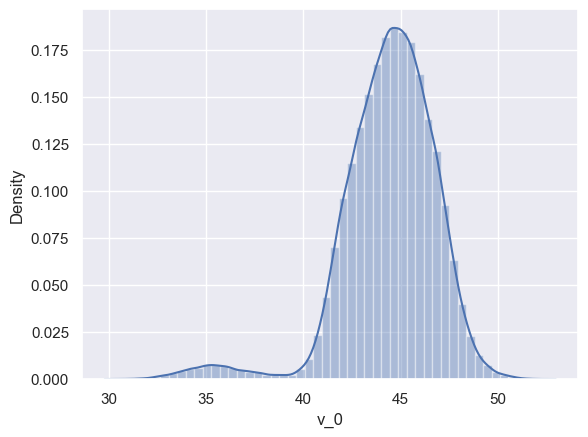

In [33]:
sns.distplot(train_data['v_0'])

### 对异常值处理

In [34]:
train_data.notRepairedDamage.nunique()

3

In [36]:
train_data.notRepairedDamage.unique()

array(['0.0', '-', '1.0'], dtype=object)

'-'是异常值，需要处理

In [37]:
train_data.notRepairedDamage.value_counts()

0.0    111361
-       24324
1.0     14315
Name: notRepairedDamage, dtype: int64

'-'  所占的数据很多，不能直接删除，需要对其填充，使用-1来填充

In [38]:
train_data.notRepairedDamage.replace('-','-1',inplace=True)

In [39]:
train_data.notRepairedDamage.value_counts()

0.0    111361
-1      24324
1.0     14315
Name: notRepairedDamage, dtype: int64

对于power，题中给出的范围是[0,600]，看一下是否有异常

In [40]:
train_data.power.describe()

count    150000.000000
mean        119.316547
std         177.168419
min           0.000000
25%          75.000000
50%         110.000000
75%         150.000000
max       19312.000000
Name: power, dtype: float64

In [41]:
train_data[train_data['power']>600]

SaleID    name   regDate  model  brand  bodyType  fuelType  gearbox  \
221        221   20197  20080601   19.0      1       2.0       0.0      1.0   
534        534    6237  19990409   67.0      0       1.0       0.0      0.0   
919        919    1562  20040604  132.0     27       1.0       0.0      0.0   
4077      4077  108917  19981103   29.0      0       1.0       0.0      1.0   
4398      4398   98510  20040912   17.0     10       0.0       1.0      1.0   
...        ...     ...       ...    ...    ...       ...       ...      ...   
148030  148030  116926  20090909   16.0     13       1.0       6.0      0.0   
148246  148246   62491  19960707   49.0      1       2.0       NaN      0.0   
148365  148365  117308  20040701   13.0      4       2.0       1.0      1.0   
148665  148665  169605  19970112   13.0      4       2.0       NaN      0.0   
149251  149251  103587  20061109  167.0     24       5.0       0.0      1.0   

        power  kilometer notRepairedDamage  regionCode  seller  offerType  \
221       740       15.0               0.0        4526       0          0   
534      7515       15.0                -1        3641       0          0   
919      1398        0.5               0.0         953       0          0   
4077      601       15.0               0.0         976       0          0   
4398     1771        7.0                -1         388       0          0   
...       ...        ...               ...         ...     ...        ...   
148030    776        6.0               0.0        7269       0          0   
148246   2598       15.0                -1        2610       0          0   
148365  17700       15.0               0.0        2128       0          0   
148665  19312       15.0               0.0        2160       0          0   
149251    680       10.0               0.0        2426       0          0   

        creatDate  price        v_0       v_1       v_2       v_3       v_4  \
221      20160308  21400  48.037180  5.532011  1.451098 -2.346850 -0.984982   
534      20160402   1499  42.167378 -3.078184 -0.719028  1.187968  0.826739   
919      20160322   3200  44.398884  4.920068  0.511202  0.763181  2.282986   
4077     20160313   1100  42.720943 -3.224472 -0.479772  2.124592  0.288400   
4398     20160314   9500  46.745149 -3.303516  0.267275 -1.066983 -1.151539   
...           ...    ...        ...       ...       ...       ...       ...   
148030   20160329   7000  43.003527 -2.876417 -0.166267 -2.945366  1.128145   
148246   20160305   1000  44.564949  3.293497 -0.306318  2.763745 -1.529225   
148365   20160320   6000  45.209563 -3.184795 -0.075872 -1.148808 -1.624366   
148665   20160309   1500  44.106748 -3.289364 -0.678614  1.881311 -1.549975   
149251   20160329  72900  50.518291 -3.412077  1.214115 -3.964348 -2.785259   

             v_5       v_6       v_7       v_8       v_9      v_10      v_11  \
221     0.262385  0.125919  0.147585  0.079600  0.025042 -6.400438  0.815636   
534     0.238117  0.000250  0.100580  0.049342  0.088342  3.555141 -0.366126   
919     0.228201  0.115767  0.118895  0.042249  0.130208 -4.199526  2.662710   
4077    0.241212  0.000000  0.144002  0.038365  0.075881  3.634530 -0.311470   
4398    0.266496  0.000486  0.149399  0.082193  0.027145  1.883733 -2.742726   
...          ...       ...       ...       ...       ...       ...       ...   
148030  0.236118  0.000949  0.047134  0.103169  0.085856  2.648312 -1.378900   
148246  0.264961  0.093730  0.146648  0.012300  0.023228 -2.808591  1.690109   
148365  0.265786  0.000190  0.122578  0.079114  0.011017  2.269612 -2.202957   
148665  0.264707  0.000000  0.144216  0.038921  0.022253  3.043651 -1.330544   
149251  0.283638  0.001000  0.166323  0.122878  0.000000  0.317541 -4.871354   

            v_12      v_13      v_14  
221     3.269936 -0.733383  0.831899  
534    -1.816826  0.920527  0.812724  
919    -0.957741  1.838586 -1.114221  
4077   -1.991555 -0.144553  0.192986  
4398    2.330571 -1.369522  0

有143条记录中的power不符合实际，使用600来代替这些值

In [56]:
train_data['power'].mask(train_data['power']>600,600, inplace=True)

In [57]:
train_data[train_data['power']>600]

Empty DataFrame
Columns: [SaleID, name, regDate, model, brand, bodyType, fuelType, gearbox, power, kilometer, notRepairedDamage, regionCode, seller, offerType, creatDate, price, v_0, v_1, v_2, v_3, v_4, v_5, v_6, v_7, v_8, v_9, v_10, v_11, v_12, v_13, v_14]
Index: []

## 模型训练与预测

### （1）构建训练和测试样本

In [59]:
## 选择特征列
feature_cols = [col for col in num_cols if col not in ['SaleID','name','regDate','creatDate','price','model','brand','regionCode','seller']]
feature_cols = [col for col in feature_cols if 'Type' not in col]

## 提前特征列，标签列构造训练样本和测试样本
X_data = train_data[feature_cols]
Y_data = train_data['price']

X_test  = testb_data[feature_cols]

print('X train shape:',X_data.shape)
print('X test shape:',X_test.shape)

X train shape: (150000, 17)
X test shape: (50000, 17)


In [60]:
## 定义了一个统计函数，方便后续信息统计
def Sta_inf(data):
    print('_min',np.min(data))
    print('_max:',np.max(data))
    print('_mean',np.mean(data))
    print('_ptp',np.ptp(data))
    print('_std',np.std(data))
    print('_var',np.var(data))

统计标签的基本分布信息

In [61]:
print('Sta of label:')
Sta_inf(Y_data)

Sta of label:
_min 11
_max: 99999
_mean 5923.327333333334
_ptp 99988
_std 7501.973469876635
_var 56279605.942732885


(array([1.23906e+05, 1.89270e+04, 4.91800e+03, 1.34000e+03, 4.71000e+02,
        1.88000e+02, 1.24000e+02, 6.00000e+01, 4.80000e+01, 1.80000e+01]),
 array([1.10000e+01, 1.00098e+04, 2.00086e+04, 3.00074e+04, 4.00062e+04,
        5.00050e+04, 6.00038e+04, 7.00026e+04, 8.00014e+04, 9.00002e+04,
        9.99990e+04]),
 <BarContainer object of 10 artists>)

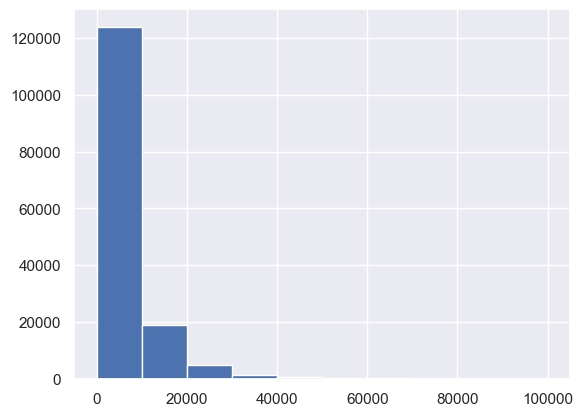

In [62]:
## 绘制标签的统计图，查看标签分布
plt.hist(Y_data)
plt.show()
plt.close()

缺失值使用-1填补

In [63]:
X_data = X_data.fillna(-1)
X_test = X_test.fillna(-1)

### （2) 利用xgb进行五折交叉验证查看模型的参数效果

In [66]:
from scipy.special import jn
from IPython.display import display, clear_output
import time



## 模型预测的
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

## 数据降维处理的
from sklearn.decomposition import PCA,FastICA,FactorAnalysis,SparsePCA

import lightgbm as lgb
import xgboost as xgb

## 参数搜索和评价的
from sklearn.model_selection import GridSearchCV,cross_val_score,StratifiedKFold,train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [67]:
## xgb-Model
xgr = xgb.XGBRegressor(n_estimators=120, learning_rate=0.1, gamma=0, subsample=0.8,\
        colsample_bytree=0.9, max_depth=7) #,objective ='reg:squarederror'

scores_train = []
scores = []

## 5折交叉验证方式
sk=StratifiedKFold(n_splits=5,shuffle=True,random_state=0)
for train_ind,val_ind in sk.split(X_data,Y_data):
    
    train_x=X_data.iloc[train_ind].values
    train_y=Y_data.iloc[train_ind]
    val_x=X_data.iloc[val_ind].values
    val_y=Y_data.iloc[val_ind]
    
    xgr.fit(train_x,train_y)
    pred_train_xgb=xgr.predict(train_x)
    pred_xgb=xgr.predict(val_x)
    
    score_train = mean_absolute_error(train_y,pred_train_xgb)
    scores_train.append(score_train)
    score = mean_absolute_error(val_y,pred_xgb)
    scores.append(score)

print('Train mae:',np.mean(score_train))
print('Val mae',np.mean(scores))

C:\Users\user\.conda\envs\mydatamining\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=120, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=120, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=120, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=120, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=120, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Train mae: 619.3800092647557
Val mae 712.4497836838209


### （3）定义xgb和lgb模型函数

In [68]:
def build_model_xgb(x_train,y_train):
    model = xgb.XGBRegressor(n_estimators=150, learning_rate=0.1, gamma=0, subsample=0.8,\
        colsample_bytree=0.9, max_depth=7) #, objective ='reg:squarederror'
    model.fit(x_train, y_train)
    return model

def build_model_lgb(x_train,y_train):
    estimator = lgb.LGBMRegressor(num_leaves=127,n_estimators = 150)
    param_grid = {
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
    }
    gbm = GridSearchCV(estimator, param_grid)
    gbm.fit(x_train, y_train)
    return gbm

### （4）切分数据集（Train,Val）进行模型训练，评价和预测

In [69]:
## Split data with val
x_train,x_val,y_train,y_val = train_test_split(X_data,Y_data,test_size=0.3)

In [70]:
print('Train lgb...')
model_lgb = build_model_lgb(x_train,y_train)
val_lgb = model_lgb.predict(x_val)
MAE_lgb = mean_absolute_error(y_val,val_lgb)
print('MAE of val with lgb:',MAE_lgb)

print('Predict lgb...')
model_lgb_pre = build_model_lgb(X_data,Y_data)
subA_lgb = model_lgb_pre.predict(X_test)
print('Sta of Predict lgb:')
Sta_inf(subA_lgb)

Train lgb...
MAE of val with lgb: 691.0707692643731
Predict lgb...
Sta of Predict lgb:
_min -874.2603016866082
_max: 92162.06494184538
_mean 5907.07025682717
_ptp 93036.32524353199
_std 7343.381201385669
_var 53925247.468864426


In [71]:
print('Train xgb...')
model_xgb = build_model_xgb(x_train,y_train)
val_xgb = model_xgb.predict(x_val)
MAE_xgb = mean_absolute_error(y_val,val_xgb)
print('MAE of val with xgb:',MAE_xgb)

print('Predict xgb...')
model_xgb_pre = build_model_xgb(X_data,Y_data)
subA_xgb = model_xgb_pre.predict(X_test)
print('Sta of Predict xgb:')
Sta_inf(subA_xgb)

Train xgb...
MAE of val with xgb: 712.122241421032
Predict xgb...
Sta of Predict xgb:
_min -355.65527
_max: 90379.76
_mean 5906.622
_ptp 90735.414
_std 7326.645
_var 53679724.0


### （5）进行两模型的结果加权融合

In [72]:
## 这里我们采取了简单的加权融合的方式
val_Weighted = (1-MAE_lgb/(MAE_xgb+MAE_lgb))*val_lgb+(1-MAE_xgb/(MAE_xgb+MAE_lgb))*val_xgb
val_Weighted[val_Weighted<0]=10 # 由于我们发现预测的最小值有负数，而真实情况下，price为负是不存在的，由此我们进行对应的后修正
print('MAE of val with Weighted ensemble:',mean_absolute_error(y_val,val_Weighted))

MAE of val with Weighted ensemble: 686.5078010624529


(array([1.23906e+05, 1.89270e+04, 4.91800e+03, 1.34000e+03, 4.71000e+02,
        1.88000e+02, 1.24000e+02, 6.00000e+01, 4.80000e+01, 1.80000e+01]),
 array([1.10000e+01, 1.00098e+04, 2.00086e+04, 3.00074e+04, 4.00062e+04,
        5.00050e+04, 6.00038e+04, 7.00026e+04, 8.00014e+04, 9.00002e+04,
        9.99990e+04]),
 <BarContainer object of 10 artists>)

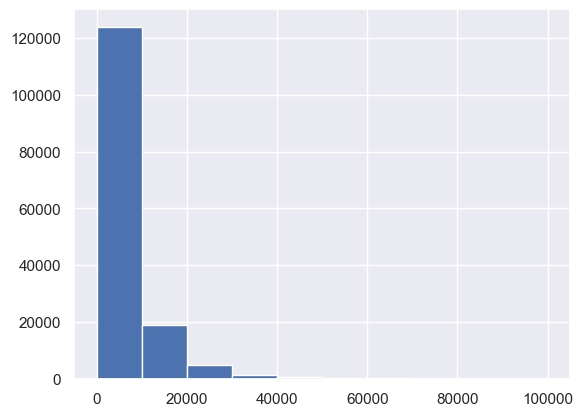

In [73]:
sub_Weighted = (1-MAE_lgb/(MAE_xgb+MAE_lgb))*subA_lgb+(1-MAE_xgb/(MAE_xgb+MAE_lgb))*subA_xgb

## 查看预测值的统计进行
plt.hist(Y_data)
plt.show()
plt.close()

### （6）输出结果

In [75]:
sub = pd.DataFrame()
sub['SaleID'] = testb_data.SaleID
sub['price'] = sub_Weighted
sub.to_csv('./sub_Weighted.csv',index=False)

In [76]:
sub.head()

SaleID        price
0  200000  1192.717232
1  200001  1726.305202
2  200002  8327.584990
3  200003  1293.612279
4  200004  2064.948587